In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
########################################################################
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1].

def load_dataset(batch):
  trainset, trainloader, testset, testloader, classes = None, None, None, None, None
  del trainset, trainloader, testset, testloader, classes
  transform = transforms.Compose(
      [transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

  trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                          download=True, transform=transform)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch,
                                            shuffle=True, num_workers=2)

  testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
  testloader = torch.utils.data.DataLoader(testset, batch_size=batch,
                                          shuffle=False, num_workers=2)

  classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
  return trainloader, testloader, classes

In [9]:
batch_size = 4
trainloader, testloader, classes = load_dataset(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [10]:
del trainloader, testloader, classes

In [11]:
CROSS_ENTROPY = 0
MSE = 1

In [12]:
class SingleLayer(nn.Module):
    def __init__(self):
        super(SingleLayer, self).__init__()
        self.fc = nn.Linear(32 * 32 * 3, 10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = self.fc(x)
        return x

question2 = SingleLayer()

In [13]:
########################################################################
# 4. Train the network
# ^^^^^^^^^^^^^^^^^^^^

def train_model(loss_function, learning_rate, question_flag):
  criterion = None; optimizer = None
  if (loss_function == CROSS_ENTROPY):
    criterion = nn.CrossEntropyLoss()
    #print("Cross Entropy")
  else: criterion = nn.MSELoss()

  if (question_flag == 2):
    optimizer = optim.SGD(question2.parameters(), lr=learning_rate, momentum=0.9)
  elif (question_flag == 3.1):
    optimizer = optim.SGD(question3_noRelu.parameters(), lr=learning_rate, momentum=0.9)
  elif (question_flag == 3.2):
    optimizer = optim.SGD(question3_Relu.parameters(), lr=learning_rate, momentum=0.9)
  # else:
  #   optimizer = optim.SGD(final_model.parameters(), lr=learning_rate, momentum=0.9)

  training_loss = []
  training_accuracy = []
  testing_accuracy = []

  for epoch in range(5):  # loop over the dataset multiple times

      running_loss = 0.0
      train_total = 0
      train_correct = 0
      for i, data in enumerate(trainloader, 0):
          # get the inputs
          inputs, labels = data

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = None
          if (question_flag == 2): outputs = question2(inputs)
          elif (question_flag == 3.1): outputs = question3_noRelu(inputs)
          elif (question_flag == 3.2): outputs = question3_Relu(inputs)
          # else: outputs = final_model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Track training accuracy
          _, predicted = outputs.max(1)
          train_total += labels.size(0)
          train_correct += (predicted == labels).sum().item()

          # print statistics
          running_loss += loss.item()

      #storing training_loss and training_accuracy
      training_loss.append(running_loss / len(trainloader))
      training_accuracy.append((train_correct / train_total)*100.00)
      print("training accuracy: " + str(training_accuracy[epoch]))
      print("training loss: " + str(training_loss[epoch]))

      test_correct = 0
      test_total = 0
      with torch.no_grad():
          for data in testloader:
              images, labels = data
              outputs = None
              if (question_flag == 2): outputs = question2(inputs)
              elif (question_flag == 3.1): outputs = question3_noRelu(inputs)
              elif (question_flag == 3.2): outputs = question3_Relu(inputs)
              # else: outputs = final_model(inputs)
              #outputs = question2(images)
              _, predicted = torch.max(outputs.data, 1)
              test_total += labels.size(0)
              test_correct += (predicted == labels).sum().item()

      testing_accuracy.append((test_correct / test_total)*100.00)
      print("testing accuracy: " + str(testing_accuracy[epoch]))
      print("===========")

  print('Finished Training')
  return training_loss, training_accuracy, testing_accuracy

In [ ]:
learning_rate = 0.001; question = 2
training_loss_2, training_accuracy_2, testing_accuracy_2 = train_model(CROSS_ENTROPY, learning_rate, question)

training accuracy: 32.086
training loss: 2.1503932684373854
testing accuracy: 9.94
training accuracy: 34.588
training loss: 2.104315380908251
testing accuracy: 9.790000000000001
training accuracy: 35.33
training loss: 2.083307761107087
testing accuracy: 10.299999999999999
training accuracy: 35.36
training loss: 2.0716607807308436
testing accuracy: 10.13


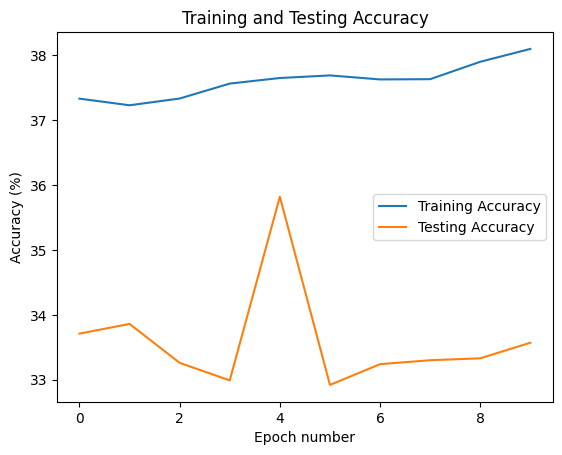

In [ ]:
plt.plot(training_accuracy_2, label='Training Accuracy')
plt.plot(testing_accuracy_2, label='Testing Accuracy')
plt.title('Training and Testing Accuracy with Single Layer')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

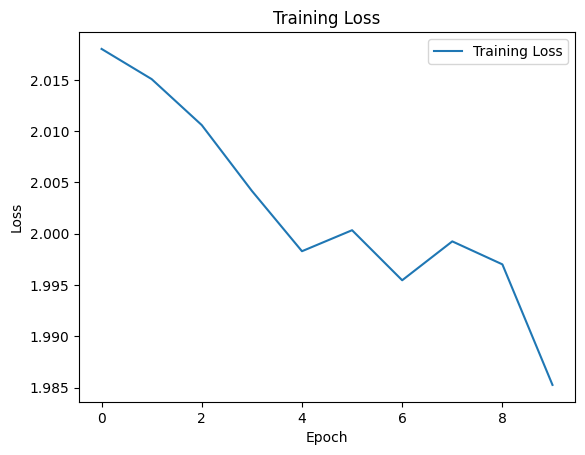

In [ ]:
plt.plot(training_loss_2, label='Training Loss')
plt.title('Training Loss With Single Layer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Section 3

In [ ]:
batch_size = 4
trainloader, testloader, classes = load_dataset(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
class MultiLayer_noRelu(nn.Module):
    def __init__(self):
        super(MultiLayer_noRelu, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 110)
        self.fc2 = nn.Linear(110, 74)
        self.fc3 = nn.Linear(74, 10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

question3_noRelu = MultiLayer_noRelu()

In [ ]:
class MultiLayer_Relu(nn.Module):
    def __init__(self):
        super(MultiLayer_Relu, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 110)
        self.fc2 = nn.Linear(110, 74)
        self.fc3 = nn.Linear(74, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

question3_Relu = MultiLayer_Relu()

In [ ]:
learning_rate = 0.001; question = 3.1
training_loss, training_accuracy, testing_accuracy = train_model(CROSS_ENTROPY, learning_rate, question)

Cross Entropy
training accuracy: 36.964000000000006
training loss: 1.7993364596962929
testing accuracy: 10.24
Finished Epoch
training accuracy: 38.916000000000004
training loss: 1.758893097140789
testing accuracy: 9.629999999999999
Finished Epoch
training accuracy: 39.654
training loss: 1.7442528957891463
testing accuracy: 10.459999999999999
Finished Epoch
training accuracy: 40.136
training loss: 1.731910684773922
testing accuracy: 9.94
Finished Epoch
training accuracy: 40.5
training loss: 1.7248566368174554
testing accuracy: 10.059999999999999
Finished Epoch
training accuracy: 40.722
training loss: 1.720787570092678
testing accuracy: 9.83
Finished Epoch
training accuracy: 40.884
training loss: 1.7147978929638863
testing accuracy: 10.37
Finished Epoch
training accuracy: 41.132000000000005
training loss: 1.7117595303630828
testing accuracy: 9.93
Finished Epoch
training accuracy: 41.264
training loss: 1.708715225840807
testing accuracy: 9.82
Finished Epoch
training accuracy: 41.598
train

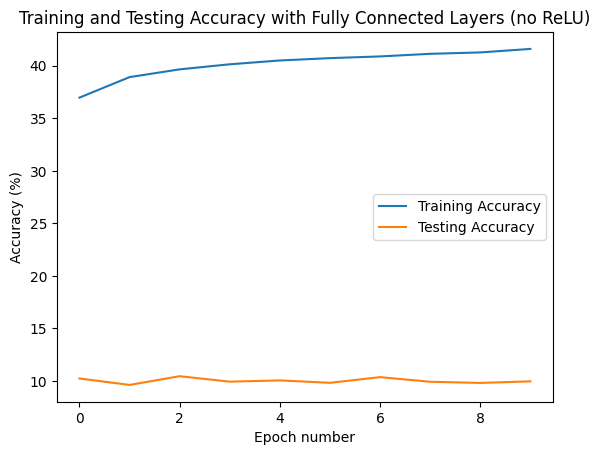

In [ ]:
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(testing_accuracy, label='Testing Accuracy')
plt.title('Training and Testing Accuracy with Fully Connected Layers (no ReLU)')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

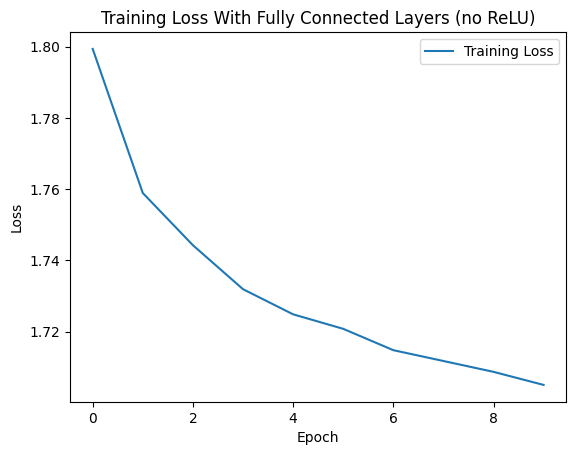

In [ ]:
plt.plot(training_loss, label='Training Loss')
plt.title('Training Loss With Fully Connected Layers (no ReLU)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
batch_size = 4
trainloader, testloader, classes = load_dataset(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
learning_rate = 0.001; question = 3.2
training_loss, training_accuracy, testing_accuracy = train_model(CROSS_ENTROPY, learning_rate, question)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-57-929c9809c7c5>", line 2, in <cell line: 2>
    training_loss, training_accuracy, testing_accuracy = train_model(CROSS_ENTROPY, learning_rate, question)
  File "<ipython-input-48-8685df603d93>", line 30, in train_model
    for i, data in enumerate(trainloader, 0):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 697, in __next__
    with torch.autograd.profiler.record_function(self._profile_name):
  File "/usr/local/lib/python3.10/dist-packages/torch/autograd/profiler.py", line 750, in __exit__
    torch.ops.profiler._record_function_exit._RecordFunction(record)
  File "/usr/local/lib/python3.10/dist-packages/torch/_ops.py", line 953, in __call__
    return self._op(*args, **kwargs)
KeyboardInterrupt

During handling of the above exce

TypeError: object of type 'NoneType' has no len()

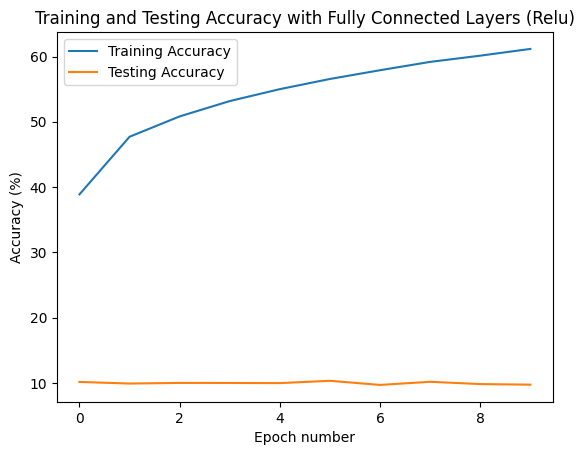

In [ ]:
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(testing_accuracy, label='Testing Accuracy')
plt.title('Training and Testing Accuracy with Fully Connected Layers (Relu)')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

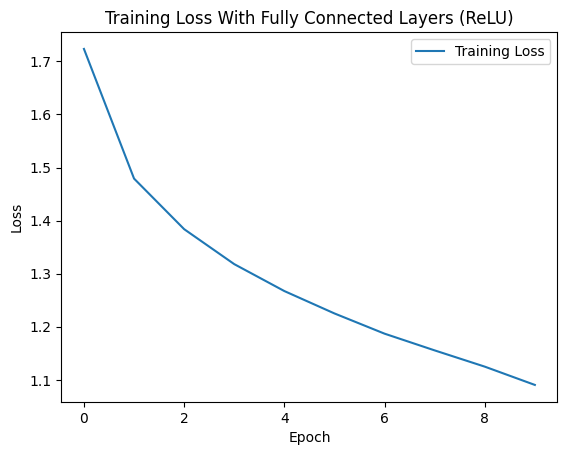

In [ ]:
plt.plot(training_loss, label='Training Loss')
plt.title('Training Loss With Fully Connected Layers (ReLU)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# training_loss = []
# training_accuracy = []
# testing_accuracy = []

# for epoch in range(10):  # loop over the dataset multiple times

#     running_loss = 0.0
#     train_total = 0
#     train_correct = 0
#     for i, data in enumerate(trainloader, 0):
#         # get the inputs
#         inputs, labels = data

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = question2(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         # Track training accuracy
#         _, predicted = outputs.max(1)
#         train_total += labels.size(0)
#         train_correct += (predicted == labels).sum().item()

#         # print statistics
#         running_loss += loss.item()
#     # print(f'Epoch {epoch + 1}, Training Loss: {running_loss / len(trainloader)}')
#     # print(f'Epoch {epoch + 1}, Training Accuracy: {(train_correct / train_total)*100.00}')
#     training_loss.append(running_loss / len(trainloader))
#     training_accuracy.append((train_correct / train_total)*100.00)

#     test_correct = 0
#     test_total = 0
#     with torch.no_grad():
#         for data in testloader:
#             images, labels = data
#             outputs = question2(images)
#             _, predicted = torch.max(outputs.data, 1)
#             test_total += labels.size(0)
#             test_correct += (predicted == labels).sum().item()

#     testing_accuracy.append((test_correct / test_total)*100.00)
#     print("Finished Epoch")

# print('Finished Training')

In [ ]:
# ########################################################################
# # 5. Test the network on the test data
# # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# #
# # We have trained the network for 2 passes over the training dataset.
# # But we need to check if the network has learnt anything at all.
# #
# # We will check this by predicting the class label that the neural network
# # outputs, and checking it against the ground-truth. If the prediction is
# # correct, we add the sample to the list of correct predictions.
# #
# # Okay, first step. Let us display an image from the test set to get familiar.

# dataiter = iter(testloader)
# images, labels = next(dataiter)

# # print images
# imshow(torchvision.utils.make_grid(images))
# print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:

# ########################################################################
# # Okay, now let us see what the neural network thinks these examples above are:

# outputs = net(images)

# ########################################################################
# # The outputs are energies for the 10 classes.
# # Higher the energy for a class, the more the network
# # thinks that the image is of the particular class.
# # So, let's get the index of the highest energy:
# _, predicted = torch.max(outputs, 1)

# print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
#                               for j in range(4)))

# ########################################################################
# # The results seem pretty good.
# #
# # Let us look at how the network performs on the whole dataset.

# # correct = 0
# # total = 0
# # with torch.no_grad():
# #     for data in testloader:
# #         images, labels = data
# #         outputs = net(images)
# #         _, predicted = torch.max(outputs.data, 1)
# #         total += labels.size(0)
# #         correct += (predicted == labels).sum().item()

# # print('Accuracy of the network on the 10000 test images: %d %%' % (
# #     100 * correct / total))

# ########################################################################
# # That looks waaay better than chance, which is 10% accuracy (randomly picking
# # a class out of 10 classes).
# # Seems like the network learnt something.
# #
# # Hmmm, what are the classes that performed well, and the classes that did
# # not perform well:

# # class_correct = list(0. for i in range(10))
# # class_total = list(0. for i in range(10))
# # with torch.no_grad():
# #     for data in testloader:
# #         images, labels = data
# #         outputs = net(images)
# #         _, predicted = torch.max(outputs, 1)
# #         c = (predicted == labels).squeeze()
# #         for i in range(4):
# #             label = labels[i]
# #             class_correct[label] += c[i].item()
# #             class_total[label] += 1


# # for i in range(10):
# #     print('Accuracy of %5s : %2d %%' % (
# #         classes[i], 100 * class_correct[i] / class_total[i]))

Predicted:    cat  frog  frog  ship
Accuracy of the network on the 10000 test images: 56 %
Accuracy of plane : 58 %
Accuracy of   car : 81 %
Accuracy of  bird : 42 %
Accuracy of   cat : 43 %
Accuracy of  deer : 52 %
Accuracy of   dog : 31 %
Accuracy of  frog : 63 %
Accuracy of horse : 64 %
Accuracy of  ship : 76 %
Accuracy of truck : 54 %
